<a href="https://colab.research.google.com/github/luizhirasawa/Curso-Pytorch/blob/main/Perceptron_na_class_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

-2.8


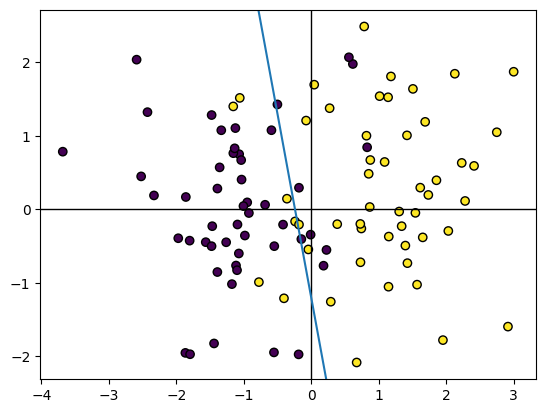

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [22]:
perc = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()
activation = nn.Tanh()

print(perc.weight.data)
print(perc.bias.data)

perc.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perc.bias = nn.Parameter(torch.Tensor([b]))

print(perc.weight.data)
print(perc.bias.data)

tensor([[ 0.2242, -0.6832]])
tensor([0.5392])
tensor([[5., 1.]])
tensor([1.2000])


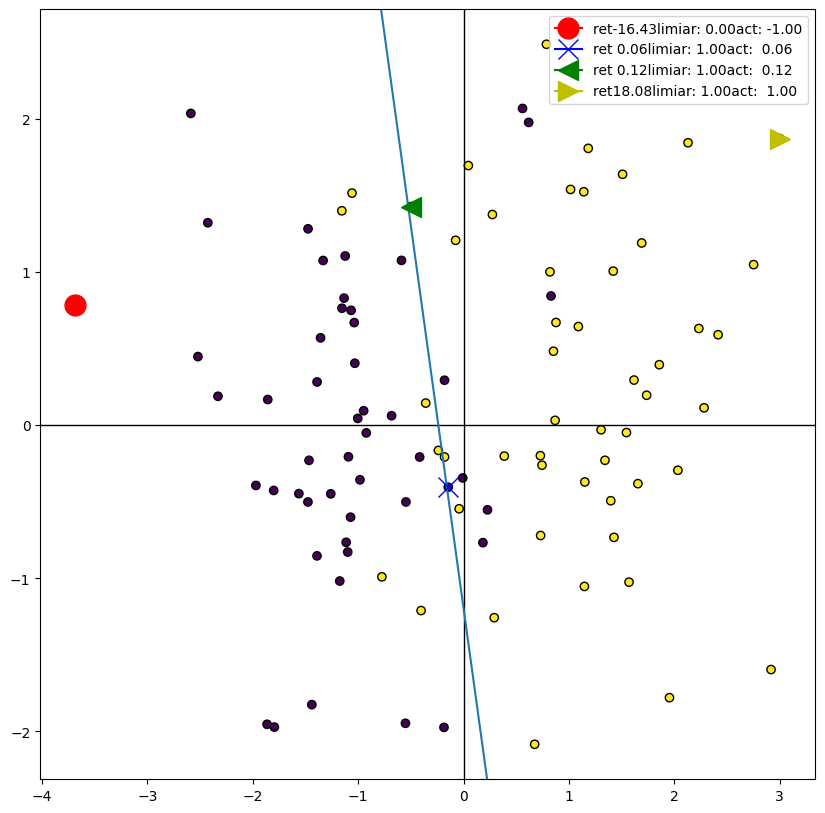

In [23]:
markers = ['o', 'x', '<', '>']
colors = ['r', 'b', 'g', 'y']

plt.figure(figsize=(10, 10))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret=perc(x)
  act = activation(ret)

  act_limiar = 0 if ret.data <0 else 1

  label = 'ret{:5.2f}'. format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])

  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=15, label = label)

plt.legend()
plt.show()